In [477]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [478]:
book_price = pd.read_excel('book_price.xlsx')
#after reading the data into the program, first and last 5 lines of the data was examined below
book_price.head()

,price,currency_unit,publisher,type,no_of_page,rating,clicking_rate,shipping_fee,year,second_hand
0,84.35,tl,Can,Science,62.0,7.24,5.534,16.0,NaN,NaN
1,86.70,tl,Dogan,Science,86.0,7.03,5.283,18.0,2019.0,no
2,74.40,tl,NaN,Science,67.0,5.14,5.294,NaN,2017.0,no
3,NaN,tl,Dogan,NaN,NaN,13.14,6.094,NaN,2022.0,no
4,61.37,NaN,Can,Science,NaN,2.77,4.547,23.0,2016.0,yes


In [479]:
book_price.tail()

,price,currency_unit,publisher,type,no_of_page,rating,clicking_rate,shipping_fee,year,second_hand
120,84.82,tl,Can,History,NaN,6.50,5.250,13.0,2018.0,NO
121,NaN,tl,NaN,History,81.0,4.87,NaN,25.0,2017.0,no
122,58.41,tl,Can,History,NaN,2.02,4.702,19.0,2016.0,yes
123,77.96,tl,Can,History,64.0,6.30,4.970,20.0,2018.0,NaN
124,59.82,tl,Can,NaN,NaN,3.10,4.500,25.0,2016.0,yes


In [480]:
book_price.info()
#the value counts and the data types was presented

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          115 non-null    float64
 1   currency_unit  112 non-null    object 
 2   publisher      113 non-null    object 
 3   type           111 non-null    object 
 4   no_of_page     110 non-null    float64
 5   rating         118 non-null    float64
 6   clicking_rate  111 non-null    float64
 7   shipping_fee   112 non-null    float64
 8   year           113 non-null    float64
 9   second_hand    111 non-null    object 
dtypes: float64(6), object(4)
memory usage: 9.9+ KB


In [481]:
book_price.columns = book_price.columns.str.title()
book_price.columns

Index(['Price', 'Currency_Unit', 'Publisher', 'Type', 'No_Of_Page', 'Rating',
       'Clicking_Rate', 'Shipping_Fee', 'Year', 'Second_Hand'],
      dtype='object')

In [482]:
new_bookprice = book_price.rename(columns = {"Price": "Price",
                                  "Currency_Unit":"Currency Unit",
                                  "No_Of_Page": "No Of Page",
                                  "Clicking_Rate": "Clicking Rate",
                                  "Shipping_Fee": "Shipping Fee",
                                  "Second_Hand": "Second Hand"})
book_price.columns = ['Price', 'Currency Unit', 'Publisher', 'Type', 'No Of Page', 'Rating', 'Clicking Rate', 'Shipping Fee', 'Year', 'Second Hand']
book_price.head()
#the column names were rehaped for practicality

,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
0,84.35,tl,Can,Science,62.0,7.24,5.534,16.0,NaN,NaN
1,86.70,tl,Dogan,Science,86.0,7.03,5.283,18.0,2019.0,no
2,74.40,tl,NaN,Science,67.0,5.14,5.294,NaN,2017.0,no
3,NaN,tl,Dogan,NaN,NaN,13.14,6.094,NaN,2022.0,no
4,61.37,NaN,Can,Science,NaN,2.77,4.547,23.0,2016.0,yes


In [483]:
book_price.describe()

,Price,No Of Page,Rating,Clicking Rate,Shipping Fee,Year
count,115.000000,110.000000,118.000000,111.000000,112.000000,113.000000
mean,113.620522,78.781818,5.714237,5.066099,29.330357,2017.707965
std,120.524705,9.654948,2.626386,0.396027,39.435976,1.437268
min,49.490000,59.000000,0.810000,4.387000,13.000000,2015.000000
25%,65.490000,72.000000,3.572500,4.742500,18.000000,2017.000000
50%,76.560000,78.500000,5.290000,5.064000,21.000000,2017.000000
75%,89.615000,86.000000,7.322500,5.304000,24.000000,2019.000000
max,500.000000,107.000000,13.880000,6.094000,210.000000,2022.000000


In [484]:
book_price['Currency Unit'] = book_price['Currency Unit'].fillna(book_price['Currency Unit'].mode()[0])
book_price['Publisher'] = book_price['Publisher'].fillna(book_price['Publisher'].mode()[0])
book_price['Type'] = book_price['Type'].fillna(book_price['Type'].mode()[0])
book_price['Year'] = book_price['Year'].fillna(book_price['Year'].mode()[0])
book_price['Second Hand'] = book_price['Second Hand'].fillna(book_price['Second Hand'].mode()[0])
book_price
#For the categorical variables 'Currency Unit', 'Publisher', 'Type', 'Year' and 'Second Hand' ;
#the mode of the observations were used to fill NaN values.  
#Also clean data was represented below

,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
0,84.35,tl,Can,Science,62.0,7.24,5.534,16.0,2017.0,no
1,86.70,tl,Dogan,Science,86.0,7.03,5.283,18.0,2019.0,no
2,74.40,tl,Can,Science,67.0,5.14,5.294,NaN,2017.0,no
3,NaN,tl,Dogan,Novel,NaN,13.14,6.094,NaN,2022.0,no
4,61.37,tl,Can,Science,NaN,2.77,4.547,23.0,2016.0,yes
...,...,...,...,...,...,...,...,...,...,...
120,84.82,tl,Can,History,NaN,6.50,5.250,13.0,2018.0,NO
121,NaN,tl,Can,History,81.0,4.87,NaN,25.0,2017.0,no
122,58.41,tl,Can,History,NaN,2.02,4.702,19.0,2016.0,yes
123,77.96,tl,Can,History,64.0,6.30,4.970,20.0,2018.0,no


In [485]:
book_price.duplicated().sum()
#the data was checked for duplicate values

0

In [486]:
for i in book_price.select_dtypes(include ='object').columns:
  print(book_price[i].value_counts())
#The data were checked for typos and value counts

tl     116
Tl       9
Name: Currency Unit, dtype: int64
Can       93
Dogan     29
DOGan      2
ODTU       1
Name: Publisher, dtype: int64
Novel      88
History    28
Science     9
Name: Type, dtype: int64
no      90
yes     21
NO      11
 YeS     3
Name: Second Hand, dtype: int64


In [487]:
book_price['Currency Unit'].loc[book_price['Currency Unit'] == 'tl'] = 'TL' 
book_price['Currency Unit'].loc[book_price['Currency Unit'] == 'Tl '] = 'TL' 
book_price['Currency Unit'].value_counts()
#the variable was reshaped into the same format

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


TL    125
Name: Currency Unit, dtype: int64

In [488]:
book_price['Publisher'].loc[book_price['Publisher'] == 'Dogan'] = 'Doğan'
book_price['Publisher'].loc[book_price['Publisher'] == 'DOGan '] = 'Doğan'  
book_price['Publisher'].loc[book_price['Publisher'] == 'Can'] = 'Can'  
book_price['Publisher'].loc[book_price['Publisher'] == 'ODTU'] = 'Odtü' 
book_price['Publisher'].value_counts()
#the variable was reshaped into the same format

Can      93
Doğan    31
Odtü      1
Name: Publisher, dtype: int64

In [489]:
book_price['Second Hand'].loc[book_price['Second Hand'] == 'no'] = 'No' 
book_price['Second Hand'].loc[book_price['Second Hand'] == 'NO'] = 'No'
book_price['Second Hand'].loc[book_price['Second Hand'] == 'yes'] = 'Yes' 
book_price['Second Hand'].loc[book_price['Second Hand'] == ' YeS'] = 'Yes'  
book_price['Second Hand'].value_counts()
#the variable was reshaped into the same format

No     101
Yes     24
Name: Second Hand, dtype: int64

In [490]:
book_price.isna().sum()
#the data was checked for null values

Price            10
Currency Unit     0
Publisher         0
Type              0
No Of Page       15
Rating            7
Clicking Rate    14
Shipping Fee     13
Year              0
Second Hand       0
dtype: int64

In [491]:
book_price.describe().transpose()
#The descriptive statistics of the data were computed

,count,mean,std,min,25%,50%,75%,max
Price,115.0,113.620522,120.524705,49.490,65.4900,76.560,89.6150,500.000
No Of Page,110.0,78.781818,9.654948,59.000,72.0000,78.500,86.0000,107.000
Rating,118.0,5.714237,2.626386,0.810,3.5725,5.290,7.3225,13.880
Clicking Rate,111.0,5.066099,0.396027,4.387,4.7425,5.064,5.3040,6.094
Shipping Fee,112.0,29.330357,39.435976,13.000,18.0000,21.000,24.0000,210.000
Year,125.0,2017.640000,1.381911,2015.000,2017.0000,2017.000,2018.0000,2022.000


In [492]:
#the mean value was computed without outliers 
book_price.Price[book_price.Price<=200].mean()

76.82247619047618

In [493]:
mean_price_without_outliers=book_price.Price[book_price.Price<=200].mean()

In [494]:
#outliers were observed 
new_book_price=book_price
new_book_price.Price[new_book_price.Price>=200]

20     500.0
22     500.0
31     500.0
50     500.0
69     500.0
70     500.0
72     500.0
109    500.0
114    500.0
117    500.0
Name: Price, dtype: float64

In [495]:
#we change the outliers with mean value
new_book_price.Price[new_book_price.Price>=200]=mean_price_without_outliers

<ipython-input-495-f2a1256f7488>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_book_price.Price[new_book_price.Price>=200]=mean_price_without_outliers


In [496]:
#The data was checked again for outliers
new_book_price.Price[new_book_price.Price>=200]

Series([], Name: Price, dtype: float64)

In [497]:
#the na values were filled with the mean 
new_book_price['Price'].fillna(value=mean_price_without_outliers, inplace=True)

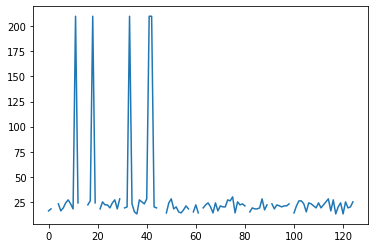

In [498]:
#outliers were observed below
new_book_price['Shipping Fee'].plot()

In [499]:
new_book_price['Shipping Fee'][new_book_price['Shipping Fee']>=150]

11    210.0
18    210.0
33    210.0
41    210.0
42    210.0
Name: Shipping Fee, dtype: float64

In [500]:
#the mean value was computed without outliers 
new_book_price['Shipping Fee'][new_book_price['Shipping Fee']<=150].mean()

20.88785046728972

In [501]:
mean_shippingfee_without_outliers=new_book_price['Shipping Fee'][new_book_price['Shipping Fee']<=150].mean()

In [502]:
#since the Shipping Fee variable is numeric, the Na 's were filled with mean value
new_book_price['Shipping Fee'][new_book_price['Shipping Fee']>=150]=mean_shippingfee_without_outliers

<ipython-input-502-1fcac90700bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_book_price['Shipping Fee'][new_book_price['Shipping Fee']>=150]=mean_shippingfee_without_outliers


In [503]:
new_book_price['Shipping Fee'].fillna(value=mean_shippingfee_without_outliers, inplace=True)

In [504]:
new_book_price.describe()

,Price,No Of Page,Rating,Clicking Rate,Shipping Fee,Year
count,125.000000,110.000000,118.000000,111.000000,125.000000,125.000000
mean,76.822476,78.781818,5.714237,5.066099,20.887850,2017.640000
std,12.987652,9.654948,2.626386,0.396027,3.802222,1.381911
min,49.490000,59.000000,0.810000,4.387000,13.000000,2015.000000
25%,67.610000,72.000000,3.572500,4.742500,19.000000,2017.000000
50%,76.822476,78.500000,5.290000,5.064000,20.887850,2017.000000
75%,83.470000,86.000000,7.322500,5.304000,23.000000,2018.000000
max,122.830000,107.000000,13.880000,6.094000,30.000000,2022.000000


In [505]:
#number of null values were observed
new_book_price.isnull().sum()

Price             0
Currency Unit     0
Publisher         0
Type              0
No Of Page       15
Rating            7
Clicking Rate    14
Shipping Fee      0
Year              0
Second Hand       0
dtype: int64

In [506]:
new_df = pd.DataFrame(new_book_price.isnull().sum())
new_df.columns = ['Missing Number']
new_df['Missing Percentage'] = (new_df['Missing Number']*100)/book_price.shape[0]
new_df
#The missing percentages of the data were examined below. 
#It is seen that the missing percentages are less than %60. Thus, the null values were filled by the following.

,Missing Number,Missing Percentage
Price,0,0.0
Currency Unit,0,0.0
Publisher,0,0.0
Type,0,0.0
No Of Page,15,12.0
Rating,7,5.6
Clicking Rate,14,11.2
Shipping Fee,0,0.0
Year,0,0.0
Second Hand,0,0.0


In [507]:
#outliers were observed
book_price[book_price.Rating>=10]

,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
3,76.822476,TL,Doğan,Novel,NaN,13.14,6.094,20.88785,2022.0,No
12,105.340000,TL,Doğan,Novel,69.0,10.89,NaN,24.00000,2021.0,No
40,105.790000,TL,Doğan,Novel,81.0,11.07,5.187,28.00000,2021.0,No
58,118.870000,TL,Doğan,Novel,72.0,13.48,5.678,20.88785,2022.0,No
93,106.920000,TL,Can,Novel,88.0,10.56,5.836,22.00000,2021.0,No
101,122.830000,TL,Doğan,History,88.0,13.88,5.398,21.00000,2017.0,No
114,76.822476,TL,Doğan,History,76.0,10.65,6.035,28.00000,2020.0,No


In [508]:
#the mean value was computed without outliers (known that the books were rated over)
mean_ratings_without_outliers=book_price.Rating[book_price.Rating<=10].mean()

In [509]:
#we change the outliers with mean value
new_book_price=book_price
new_book_price.Rating[new_book_price.Rating>=10] = mean_ratings_without_outliers

<ipython-input-509-d26f2606e20c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_book_price.Rating[new_book_price.Rating>=10] = mean_ratings_without_outliers


In [510]:
#The data was checked again for outliers
new_book_price.Rating[new_book_price.Rating>=10]

Series([], Name: Rating, dtype: float64)

In [511]:
new_book_price['No Of Page'].fillna(value=new_book_price['No Of Page'].mean(), inplace=True)
new_book_price['Rating'].fillna(value=book_price.Rating[book_price.Rating<=10].mean(), inplace=True)
new_book_price['Clicking Rate'].fillna(value=new_book_price['Clicking Rate'].mean(), inplace=True)
#Since 'number of pages', 'Rating' and 'clicking rate' are numerical values were used to fill na values.

In [512]:
#final number of nulls
new_book_price.isnull().sum()

Price            0
Currency Unit    0
Publisher        0
Type             0
No Of Page       0
Rating           0
Clicking Rate    0
Shipping Fee     0
Year             0
Second Hand      0
dtype: int64

In [513]:
new_book_price.head()
#final clean data was observed below

,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
0,84.350000,TL,Can,Science,62.000000,7.240000,5.534,16.00000,2017.0,No
1,86.700000,TL,Doğan,Science,86.000000,7.030000,5.283,18.00000,2019.0,No
2,74.400000,TL,Can,Science,67.000000,5.140000,5.294,20.88785,2017.0,No
3,76.822476,TL,Doğan,Novel,78.781818,5.320811,6.094,20.88785,2022.0,No
4,61.370000,TL,Can,Science,78.781818,2.770000,4.547,23.00000,2016.0,Yes


In [514]:
new_book_price.tail()

,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
120,84.820000,TL,Can,History,78.781818,6.50,5.250000,13.0,2018.0,No
121,76.822476,TL,Can,History,81.000000,4.87,5.066099,25.0,2017.0,No
122,58.410000,TL,Can,History,78.781818,2.02,4.702000,19.0,2016.0,Yes
123,77.960000,TL,Can,History,64.000000,6.30,4.970000,20.0,2018.0,No
124,59.820000,TL,Can,Novel,78.781818,3.10,4.500000,25.0,2016.0,Yes


In [515]:
#year variable was converted to the right data type 
book_price['Year'] = book_price['Year'].astype(int)

In [516]:
pd.to_datetime(book_price.Year, format='%Y')

0     2017-01-01
1     2019-01-01
2     2017-01-01
3     2022-01-01
4     2016-01-01
         ...    
120   2018-01-01
121   2017-01-01
122   2016-01-01
123   2018-01-01
124   2016-01-01
Name: Year, Length: 125, dtype: datetime64[ns]

In [517]:
new_book_price['Year'] = pd.to_datetime(book_price.Year, format='%Y')

In [518]:
#the data was checked again for the right data types
book_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Price          125 non-null    float64       
 1   Currency Unit  125 non-null    object        
 2   Publisher      125 non-null    object        
 3   Type           125 non-null    object        
 4   No Of Page     125 non-null    float64       
 5   Rating         125 non-null    float64       
 6   Clicking Rate  125 non-null    float64       
 7   Shipping Fee   125 non-null    float64       
 8   Year           125 non-null    datetime64[ns]
 9   Second Hand    125 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 9.9+ KB


In [519]:
#the  clean data was downloaded as an excel file 
book_price.to_excel('book_priceCleanData.xlsx')